In [1]:
import pandas as pd
import numpy as np
import pickle
from google.colab import drive
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
drive.mount('/drive')
uploaded = '/drive/My Drive/CS286/286Project/processed_data.pkl' #normal copy data
#uploaded = '/drive/My Drive/CS286/286Project/processed_data(max_copy_number).pkl' #Max copy data

Mounted at /drive


In [3]:
with open(uploaded, 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict.keys())
#print(loaded_dict['copy_number_matrix'].shape, '\n', loaded_dict['copy_number_matrix'])
#print(len(loaded_dict['labels']), '\n', loaded_dict['labels'])
#print(len(loaded_dict['patient_ids']), '\n', loaded_dict['patient_ids'])
#print(len(loaded_dict['gene_ids']),'\n', loaded_dict['gene_ids'])

dict_keys(['copy_number_matrix', 'patient_ids', 'labels', 'gene_ids'])


In [4]:
X_copy_number = loaded_dict['copy_number_matrix']
y_label = loaded_dict['labels']
#gene_ids = loaded_dict['gene_ids']
#print(X_copy_number)

In [5]:
#Generating Classifiers 
names = ["Nearest Neighbors", "Decision Tree", "Random Forest", "SVM Linear", "SVM RBF", "SVM poly"]

classifiers = [
    KNeighborsClassifier(n_neighbors=6),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth = 3, max_features = "sqrt"),
    SVC(kernel = 'linear', gamma=0.01, C=0.1),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly', degree=2)
]

X_train, X_test, y_train, y_test = train_test_split(X_copy_number, y_label, random_state=40, test_size=0.2)

models = zip(names, classifiers)
results = []
names = []
accuracies = []
for name, model in models:
  kfold = model_selection.KFold(n_splits = 10)
  print('Cross validation on', name)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
  names.append(name)
  print("Validation on test dataset")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  print("ROC AUC for {0}: {1}".format(name, round(roc_auc_score(y_test, y_pred), 3)))
  print('Validation Accuracy:', round(accuracy_score(y_test, y_pred), 3))
  accuracies.append(round(accuracy_score(y_test, y_pred), 3))

Cross validation on Nearest Neighbors
Validation on test dataset
ROC AUC for Nearest Neighbors: 0.84
Validation Accuracy: 0.84
Cross validation on Decision Tree
Validation on test dataset
ROC AUC for Decision Tree: 0.853
Validation Accuracy: 0.854
Cross validation on Random Forest
Validation on test dataset
ROC AUC for Random Forest: 0.872
Validation Accuracy: 0.873
Cross validation on SVM Linear
Validation on test dataset
ROC AUC for SVM Linear: 0.873
Validation Accuracy: 0.873
Cross validation on SVM RBF
Validation on test dataset
ROC AUC for SVM RBF: 0.891
Validation Accuracy: 0.892
Cross validation on SVM poly
Validation on test dataset
ROC AUC for SVM poly: 0.9
Validation Accuracy: 0.901


['Nearest Neighbors', 'Decision Tree', 'Random Forest', 'SVM Linear', 'SVM RBF', 'SVM poly']
[0.84, 0.854, 0.873, 0.873, 0.892, 0.901]


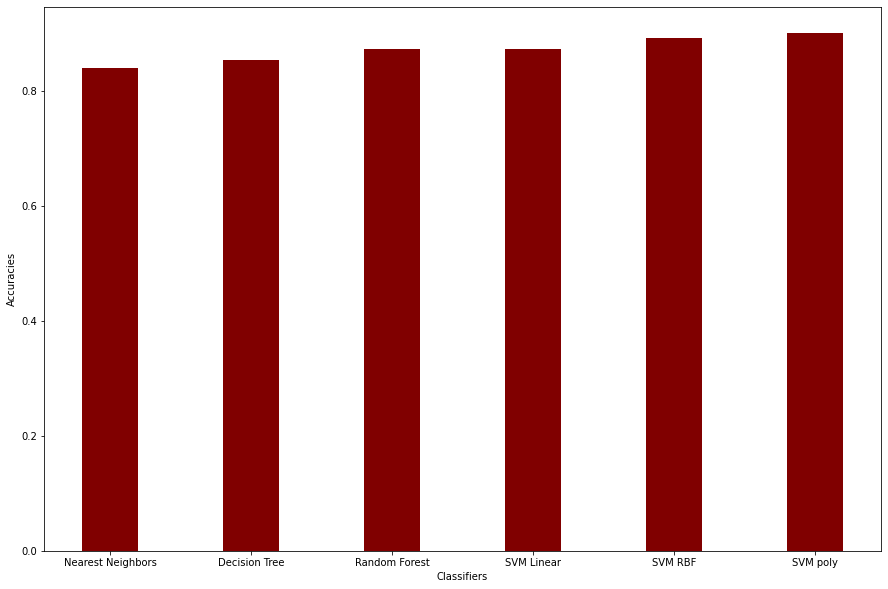

In [6]:
print(names)
print(accuracies)

fig = plt.figure(figsize = (15, 10))
plt.bar(names, accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Classifiers")
plt.ylabel("Accuracies")
plt.show()